In [17]:
import json
import matplotlib.pyplot as plt

In [61]:
# Load ground thruth user traces
with open("user_data.json") as f:
    data = json.load(f)

with open("sniffed_user.json") as f:
    sniffed = json.load(f)

In [62]:
PLOT_NR_USERS = 5

BLUETOOTH_RANGE = 10
WIFI_RANGE = 30
LTE_RANGE = 100

In [63]:
locations = []

# Extract user locations from our dataset
for i in range(0, PLOT_NR_USERS):
    user_data = [ r for r in data if r["user_id"] == f"User{i+1}" ]
    user_locs = [ r["location"] for r in user_data ]
    locations.append(user_locs)

In [64]:
sniffer_locations = {}

for rec in sniffed:
    sniffer_id = rec["sniffer_id"]
    sniffer_loc = rec["sniffer_location"]

    sniffer_locations[sniffer_id] = sniffer_loc

print(sniffer_locations)

{21: [-171.39475871545562, -96.85628176346415], 1: [457.6696601152796, 337.7389736664187], 39: [153.7461778746433, -482.3718976577965], 33: [-467.88104923337147, 64.70908951512718], 19: [-456.9673253970442, -32.745150775900015], 22: [-472.9624089906072, -45.457120524610616], 8: [339.1770556081393, 294.85490551170574], 2: [-203.0195148077134, -75.4513422562577]}


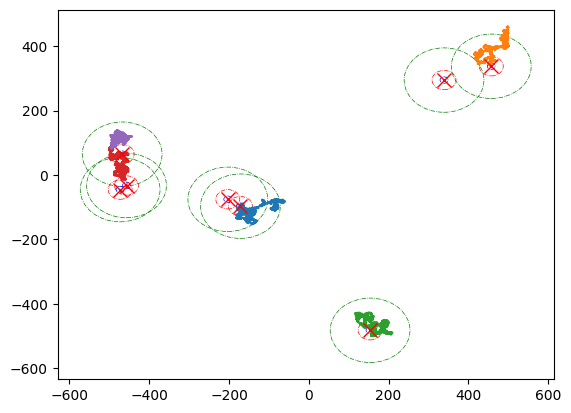

In [66]:
# Plot trajectories for some users
for user_locs in locations:
    xs = [l[0] for l in user_locs]
    ys = [l[1] for l in user_locs]

    plt.plot(xs, ys)

# Mark locations of sniffers
ax = plt.gca()
for identifier, location in sniffer_locations.items():
    [x, y] = location
    plt.plot(x, y, 'rx', markersize=10)

    # showing Bluetooth range
    for rad, col in [(BLUETOOTH_RANGE, 'b'), (WIFI_RANGE, 'r'), (LTE_RANGE, 'g')]:
        circle = plt.Circle((x, y), rad, color=col, fill=False, linestyle='-.', linewidth=0.5)
        ax.add_patch(circle)